# Tensorflow
## Softmax Sample

In [101]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from keras.datasets import mnist

import numpy as np

In [102]:
model=Sequential([
    Input(shape=(784,)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
])

In [103]:
path = '/kaggle/input/mnisttf/mnist.npz'
(x_train,y_train),(x_show,y_test)=mnist.load_data(path='/kaggle/input/mnisttf/mnist.npz')

print(x_train.shape,y_train.shape)
print(x_show.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [104]:
x_train=x_train.reshape(60000,784).astype('float32')/255.0
x_test=x_show.reshape(10000,784).astype('float32')/255.0


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [105]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [106]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4075 - accuracy: 0.8853
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2182 - accuracy: 0.9380
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1762 - accuracy: 0.9484
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1531 - accuracy: 0.9553
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1385 - accuracy: 0.9595
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9626
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9643
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9665
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9679
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [120]:
model.save(r'data_model/mnist_pre.h5')

In [107]:
k=3

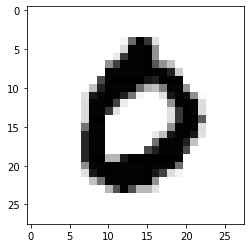

In [108]:
import matplotlib.pyplot as plt
plt.imshow(x_show[k],cmap="binary")
plt.show()

In [109]:
pre=x_test[k].reshape(1,784)
x_out=model(pre)
y_out=tf.nn.softmax(x_out)

In [110]:
print(y_out)

tf.Tensor(
[[1.0000000e+00 6.1988431e-32 4.2234237e-17 1.9498606e-17 8.7358911e-27
  5.3904315e-19 4.1882777e-14 1.5366010e-23 2.5819944e-16 5.8576635e-13]], shape=(1, 10), dtype=float32)


In [118]:
# find can replace by model.predict(pre)

n=0
tmp=0

for i in range(0,9):
    if(y_out[0][i]>n):
        tmp=i
        n=y_out[0][i]
        
print("predict:  ",tmp)
print("true:     ",y_test[k])

predict:   0
true:      0
